# 🏠 House Price Prediction - Linear Regression (Real Dataset)
This notebook implements Multiple Linear Regression on the real Housing dataset.

### Step 1: Import Libraries

In [47]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    

### Step 2: Load the Dataset

In [48]:

df = pd.read_csv("Housing.csv")
print(df.to_string())
    

        price   area  bedrooms  bathrooms  stories mainroad guestroom basement hotwaterheating airconditioning  parking prefarea furnishingstatus
0    13300000   7420         4          2        3      yes        no       no              no             yes        2      yes        furnished
1    12250000   8960         4          4        4      yes        no       no              no             yes        3       no        furnished
2    12250000   9960         3          2        2      yes        no      yes              no              no        2      yes   semi-furnished
3    12215000   7500         4          2        2      yes        no      yes              no             yes        3      yes        furnished
4    11410000   7420         4          1        2      yes       yes      yes              no             yes        2       no        furnished
5    10850000   7500         3          3        1      yes        no      yes              no             yes        2     

### Step 3: Preprocessing - Encode Categorical Variables

In [49]:
yes_no_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in yes_no_columns:
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0})
    else:
        print(f"Column '{col}' not found, skipping.")
if 'furnishingstatus' in df.columns:
    df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
else:
    print("Column 'furnishingstatus' not found, skipping one-hot encoding.")
print(df.to_string())

    

        price   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  hotwaterheating  airconditioning  parking  prefarea  furnishingstatus_semi-furnished  furnishingstatus_unfurnished
0    13300000   7420         4          2        3         1          0         0                0                1        2         1                            False                         False
1    12250000   8960         4          4        4         1          0         0                0                1        3         0                            False                         False
2    12250000   9960         3          2        2         1          0         1                0                0        2         1                             True                         False
3    12215000   7500         4          2        2         1          0         1                0                1        3         1                            False                         False
4    11410

### Step 4: Define Features and Target

In [50]:
X = df.drop('price', axis=1)
y = df['price']
    

### Step 5: Split Data into Training and Testing Sets

In [51]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

### Step 6: Train Linear Regression Model

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)
    

LinearRegression()

### Step 7: Make Predictions

In [53]:

y_pred = model.predict(X_test)
    

### Step 8: Evaluate the Model

In [54]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
    

Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.65


### Step 9: Visualize Actual vs Predicted Prices

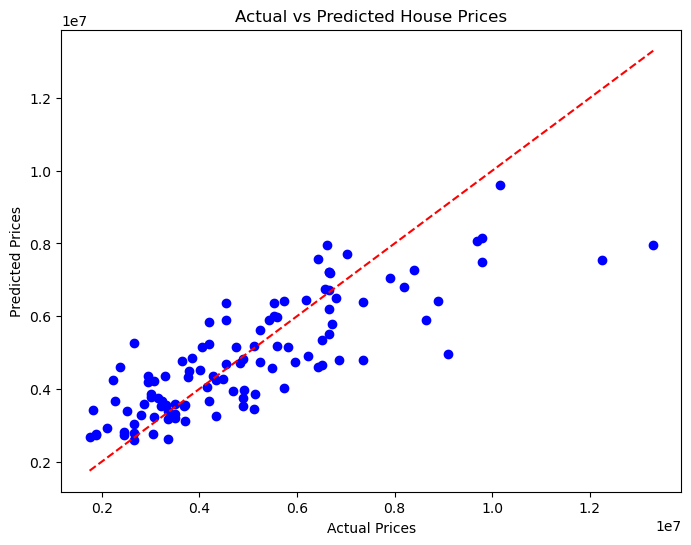

In [55]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
    

### Step 10: Interpret Model Coefficients

In [56]:

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)
print(f"Intercept: {model.intercept_:.2f}")
    

                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                          mainroad  3.679199e+05
5                         guestroom  2.316100e+05
6                          basement  3.902512e+05
7                   hotwaterheating  6.846499e+05
8                   airconditioning  7.914267e+05
9                           parking  2.248419e+05
10                         prefarea  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
Intercept: 260032.36
